## Pymaceuticals 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
mouse_data = pd.read_csv("resources/mouse_drug_data.csv")
clinical_data = pd.read_csv("resources/clinicaltrial_data.csv")
# mouse_data.head()
# clinical_data.head()

In [3]:
# Combine two dataset into a single dataset
combined_data = pd.merge(clinical_data, mouse_data, on= 'Mouse ID', how='left')
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


### Tumor Response to Treatment

In [4]:
# Created dataframe of mean tumor volume of each drug corresponding to Timepoint
Tumor_volume_mean = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
Tumor_volume_mean.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# To get sem of mean tumor volume
Tumor_volume_sem = combined_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
Tumor_volume_sem.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Pivoted tumor mean dataframe to bring tumor volume values for each drug in columns
Tumor_mean_df = Tumor_volume_mean.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
Tumor_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


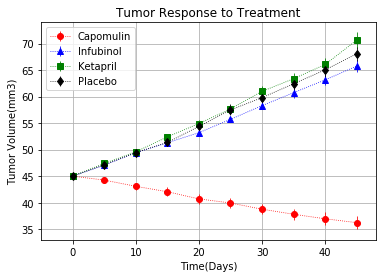

In [7]:
# To generate plot of tumor volume with error bars. Set x axis as Timepoint
x_axis = Tumor_mean_df.index
# To assign error values for the required drugs.
Tumor_volume_error = Tumor_volume_sem.pivot(index = 'Timepoint', columns='Drug', values='Tumor Volume (mm3)')
err_y = Tumor_volume_error['Capomulin']
err_y1 = Tumor_volume_error.Infubinol
err_y3 = Tumor_volume_error.Ketapril
err_y4 = Tumor_volume_error.Placebo
plt.errorbar(x_axis, Tumor_mean_df.Capomulin, yerr=err_y, marker = 'o', lw = .8, ls = ':', color = 'red', label ="Capomulin")
plt.errorbar(x_axis, Tumor_mean_df.Infubinol, yerr=err_y1, marker = '^', lw = .8, ls =':', color = 'blue', label = "Infubinol")
plt.errorbar(x_axis, Tumor_mean_df.Ketapril, yerr = err_y3, marker ='s', lw = .8, ls =':', color ='green', label = "Ketapril")
plt.errorbar(x_axis, Tumor_mean_df.Placebo, yerr = err_y4, marker = 'd', lw = .8, ls = ':', color = 'black', label = "Placebo")
plt.xlim(-5, max(x_axis)+3)
plt.ylim(33, 74)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume(mm3)")
plt.grid()
plt.legend()
plt.show()

### Metastatic Response to Treatment

In [8]:
# To calculate mean metastatic sites
Mean_Metsite = combined_data.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
Mean_Metsite = pd.DataFrame({"Metastatic Sites": Mean_Metsite})
Mean_Metsite.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# To get standard error mean value for metastatic sites data
Error_Metsite = combined_data.groupby(['Drug','Timepoint'])[['Metastatic Sites']].sem()
Error_Metsite.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
Metsite_mean_df = Mean_Metsite.pivot_table(index=Mean_Metsite.index.get_level_values(1) , 
                                           columns=Mean_Metsite.index.get_level_values(0), values='Metastatic Sites')
Metsite_mean_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


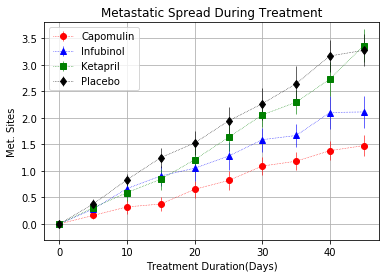

In [12]:
# Set x axis to the Treatment duration
x_axis = Metsite_mean_df.index
#  Pivoted met. site error dataframe to extract column values for errors
sem_met = Error_Metsite.pivot_table(index= Error_Metsite.index.get_level_values(1), 
                                    columns= Error_Metsite.index.get_level_values(0), values = 'Metastatic Sites')
fig, ax= plt.subplots()
y1 = Metsite_mean_df.Capomulin
y2= Metsite_mean_df.Infubinol
y3 = Metsite_mean_df.Ketapril
y4 = Metsite_mean_df.Placebo
ax.errorbar(x_axis, y1, yerr=sem_met.Capomulin , marker ='o', color= 'r', ls= ':', lw =.6, label='Capomulin')
ax.errorbar(x_axis, y2, yerr=sem_met.Infubinol, marker = '^', color='b', ls = ':', lw =.6, label = 'Infubinol')
ax.errorbar(x_axis, y3, yerr= sem_met.Infubinol, marker = 's', color = 'g', ls =':', lw =.6, label = 'Ketapril')
ax.errorbar(x_axis, y4, yerr=sem_met.Placebo, marker ='d', color = 'k', ls =':', lw = .6, label = 'Placebo')
ax.set_ylim(-0.3,3.8)
ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration(Days)")
ax.set_ylabel("Met. Sites")
plt.legend()
plt.grid()
plt.savefig("image.png")
plt.show()

### Survival Rate

In [12]:
# Dataframe to list the mice count 
Mouse_count = combined_data.groupby(['Drug','Timepoint'])['Mouse ID'].count().reset_index()
Mouse_count = Mouse_count.rename(columns={"Mouse ID": "Mouse Count"})
Mouse_count.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
Mouse_count_df = Mouse_count.pivot(index= 'Timepoint', columns= 'Drug', values='Mouse Count')
Mouse_count_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


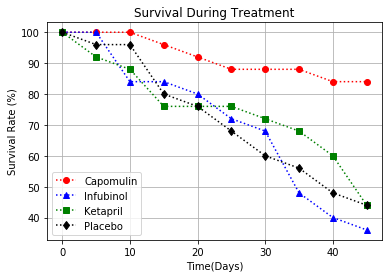

In [14]:
# To generate plot of survival rate during treatment
x = Mouse_count_df.index
# Multiply column value to 4 times to count for percentages
y = Mouse_count_df.Capomulin*4
y1 = Mouse_count_df.Infubinol*4
y2 = Mouse_count_df.Ketapril*4
y3 = Mouse_count_df.Placebo*4
plt.title("Survival During Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Survival Rate (%)")
plt.plot(x, y, marker ='o', color = 'r', label ='Capomulin', ls = ':')
plt.plot(x, y1, marker = '^', color = 'b', label = 'Infubinol', ls =':')
plt.plot(x, y2, marker = 's', color = 'green', label = 'Ketapril', ls = ':')
plt.plot(x, y3, marker = 'd', color = 'k', label = 'Placebo', ls = ':')
plt.legend()
plt.grid()
plt.save

plt.show()

### Summary Graph

In [15]:
# To calculate the percent change in tumor volume for each drug
# Selected the mean tumor volume for the last and first day of each drug for the required calculation
S1 = Tumor_mean_df.iloc[-1,:]
S2 = Tumor_mean_df.iloc[0, :]
percent_change = (S1-S2)/S2*100
# Display the data
percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

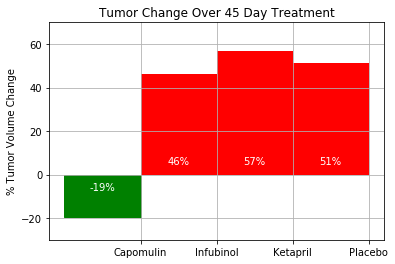

In [16]:
# Extract the percent change data for the required drug
drug_studied = percent_change[['Capomulin', 'Infubinol', 'Ketapril','Placebo']]
# Set y aixs, x axis and tick location and symbols for the plot 
y= drug_studied.values
Drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x = np.arange(0, len(Drugs))
tick = [x+0.5 for x in x]
plt.xticks(tick, Drugs)
plt.ylim(-30, 70)
bar_plot = plt.bar(x, y, color='r', width = 1)
# Set negative tumor volume value in green color
bar_plot[0].set_color('g')

# To diplay value in percent format on each bar
for bar in bar_plot:
    height = round(int(bar.get_height()))
    x1 = bar.get_x() + bar.get_width()/2
    if height < 0:
        y1 = -7
    else:
        y1 = 5
    plt.text(x1, y1, '%d' % height +"%", ha ='center', color = 'w', fontsize = 10)
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.show()

### Observable Trends:

1. The analysis of tumor volume over the treatment duration, Capomulin shows a significant decrease in tumor volume than placebo(no drug) and other drugs wheras tumor volume increased fairly during Ketapril treatment regimen.

2. Metastatic spread during treatment of all three drugs was less compared to Placebo, the drug Capomulin shows higher reduction in metastatic spread to other sites than other drugs.

3. Mice survival rate was fairly better for Capomulin than other drugs over the treatment duration which was around 85%    whereas survival rate for Infubinol was significantly low.

